<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/학회/방학 프로젝트/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/학회/방학 프로젝트/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/학회/방학 프로젝트/sample_submission.csv") # 제출용 파일



---



> 데이터 전처리



In [ ]:
# Seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

In [ ]:
#csv to parquet - 메모리에 효율적인 데이터 유형 사용
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [ ]:
csv_to_parquet('/content/drive/MyDrive/Colab_Notebooks/학회/방학 프로젝트/train.csv', 'train1')
csv_to_parquet('/content/drive/MyDrive/Colab_Notebooks/학회/방학 프로젝트/test.csv', 'test1')

train1 Done.
test1 Done.


In [ ]:
#Data load
train = pd.read_parquet('./train1.parquet')
test = pd.read_parquet('./test1.parquet')

In [ ]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,None
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None


In [ ]:
#결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [ ]:
train.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,890981.000000,890960.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,891003.000000
mean,6.945156,15.764842,1341.153019,1493.295934,0.0,0.0,12696.278484,12701.813986,784.078499,19997.388093
std,3.462506,8.763515,489.814011,520.803494,0.0,0.0,1514.938441,1515.213044,590.790469,404.268639
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,4.000000,8.000000,925.000000,1105.000000,0.0,0.0,11292.000000,11292.000000,350.000000,19790.000000
50%,7.000000,16.000000,1332.000000,1524.000000,0.0,0.0,12889.000000,12889.000000,623.000000,19977.000000
75%,10.000000,23.000000,1742.000000,1924.000000,0.0,0.0,14057.000000,14057.000000,1020.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


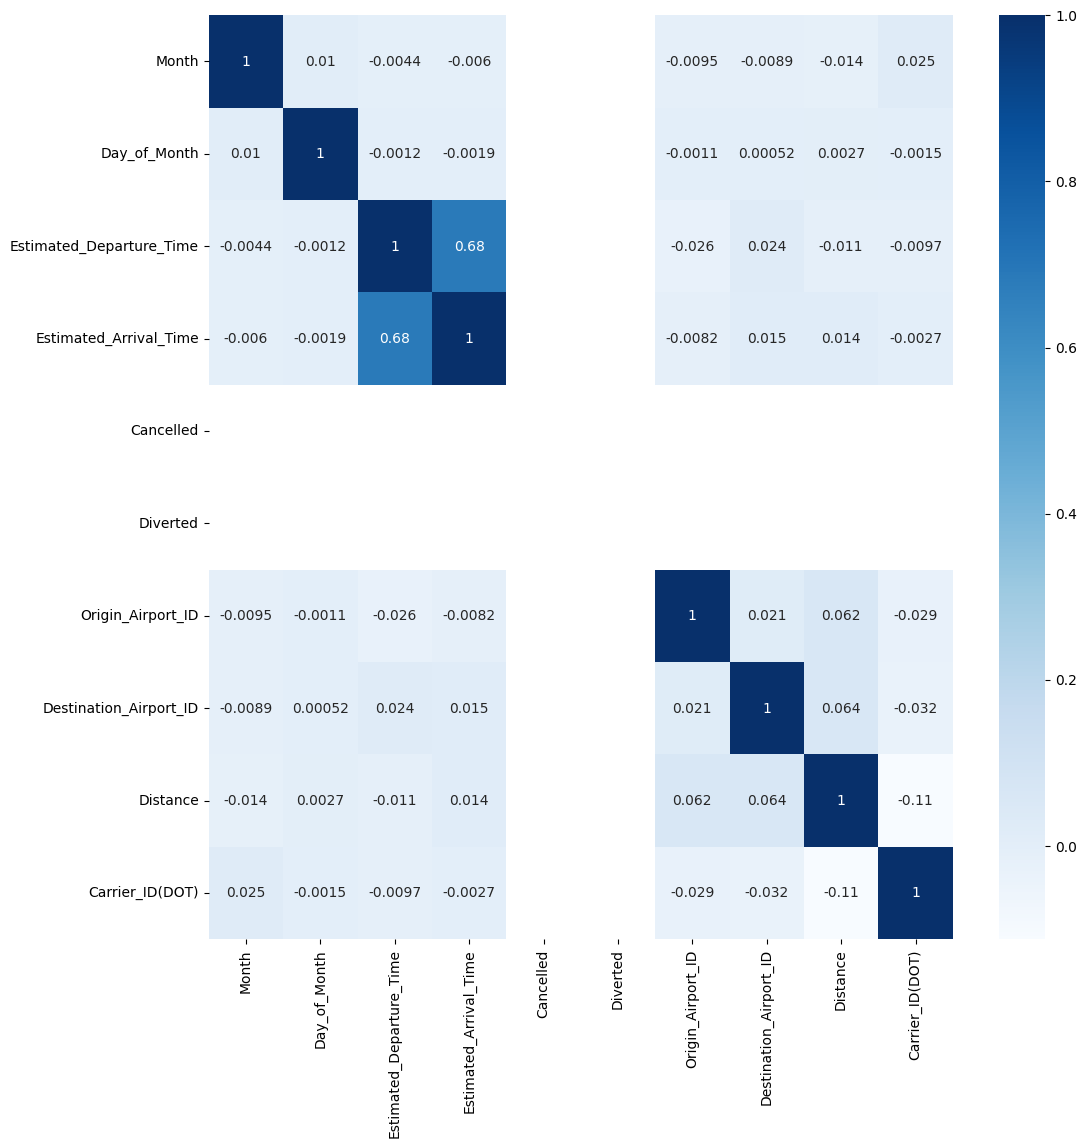

In [ ]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

###train data

1. ID : 샘플 고유 id
2. Month: 해당 항공편의 출발 월
3. Day_of_Month: Month에 해당하는 월의 날짜
4. Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (현지 시각, HH:MM 형식)
5. Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (현지 시각, HH:MM 형식)
6. Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
7. Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
8. Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
9. Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
10. Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
11. Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
12. Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
13. Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
14. Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
15. Airline: 해당 항공편을 운항하는 항공사
Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
16. Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
17. Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
18. Delay: 항공편 지연 여부 (Not_Delayed, Delayed) 예측해야 하는 타깃
다수의 데이터에 레이블이 존재하지 않음
준지도학습을 통해 레이블링 가능

1. iD 변수 처리

샘플 고유 id이기 때문에 굳이 필요 없는 데이터 -> 삭제

In [ ]:
train = train.drop(columns=['ID'])
train.head(3)

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None
1,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None
2,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None


2. Cancelled, Diverted 변수 처리

데이터 값이 모두 0이기 때문에 데이터 삭제

In [ ]:
train['Cancelled'].value_counts()

0    1000000
Name: Cancelled, dtype: int64

In [ ]:
train['Diverted'].value_counts()

0    1000000
Name: Diverted, dtype: int64

In [ ]:
train = train.drop(columns=['Cancelled','Diverted'])
train.head(3)

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,4,15,NaN,NaN,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None
1,8,15,740.0,1024.0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None
2,9,6,1610.0,1805.0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None


3. Delay 변수 처리

다수의 데이터에 레이블이 존재하지 않아 준지도학습으로 레이블링

cf) 준지도학습이란?

- 지도학습과 비지도학습 사이에 있는 학습 방법으로, 레이블이 존재하는 데이터와 존재하지 않는 데이터 모두를 훈련에 사용하는 것

- 레이블이 적용된 적은 수의 샘플이 주어졌을 때 유용한 방법으로 비지도 학습을 통해 군집을 분류한 후 샘플들을 활용해 지도 학습을 실행함

- 대표적인 준지도학습 : 심층 신뢰 신경망, 제한된 볼츠만 머신

## 준지도학습을 실제 데이터에 적용하는 예제가 별로 없음

cf) 심층신경망
* 심층신경망 : 입력층과 출력층 사이에 다수의 은닉층을 포함하여 다양한 비선형적 관계를 학습할 수 있음
* 신경망 학습의 목적 : 전체 네트워크의 층과 층 사이에서의 연산에 사용되는 모든 가중치들의 최적값을 찾는 것이며 모델에 따라 정의한 LOSS가 충분히 줄어들 때까지 가중치의 업데이트를 반복하는 것


[학습 과정 - 다음의 절차를 정해진 횟수만큼 반복]
1. 배치 사이즈만큼의 훈련 샘플 (x,y)를 가져와 입력층에 데이터 x를 입력한다.
2. 전체 네트워크를 따라 가중치(weight)를 곱하고 활성함수를 거쳐 입력 데이터를 변환하고 출력값 yhat을 계산한다.
3. 출력된 yhat과 실제 y값의 오차를 사용해 현재 배치 안에서 평균 LOSS를 계산한다 (회귀 : MSE, 분류 : Cross entropy)
4. 출력층부터 입력층까지 역방향으로 되돌아가며 가중치 파라미터에 대한 LOSS의 그래디언트를 계산하고, LOSS가 줄어드는 방향으로 가중치를 업데이트
5. 다음 배치 사이즈만큼의 훈련 샘플을 가져와 반복한다.

###test data

1. ID : 샘플 고유 id
2. Month: 해당 항공편의 출발 월
3. Day_of_Month: Month에 해당하는 월의 날짜
4. Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (현지 시각, HH:MM 형식)
5. Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (현지 시각, HH:MM 형식)
6. Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
7. Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
8. Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
9. Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
10. Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
11. Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
12. Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
13. Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
14. Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
15. Airline: 해당 항공편을 운항하는 항공사
16. Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
17. Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
18. Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호



---



In [ ]:
#Data preprocessing
#레이블(Delay)을 제외한 결측값이 존재하는 변수들을 학습 데이터의 최빈값으로 대체
NaN_col = ['Origin_State','Destination_State','Airline','Estimated_Departure_Time', 'Estimated_Arrival_Time','Carrier_Code(IATA)','Carrier_ID(DOT)']

for col in NaN_col:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)

    if col in test.columns:
        test[col] = test[col].fillna(mode)
print('Done.')

Done.


In [ ]:
#질적 변수들을 수치화
from sklearn.preprocessing import LabelEncoder

qual_col = ['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State', 'Airline', 'Carrier_Code(IATA)', 'Tail_Number']

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])

    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])
print('Done.')

Done.


In [ ]:
#레이블이 없는 데이터들을 제거
train = train.dropna()

In [ ]:
column_number = {}
for i, column in enumerate(submission.columns):
    column_number[column] = i

def to_number(x, dic):
    return dic[x]

train.loc[:, 'Delay_num'] = train['Delay'].apply(lambda x: to_number(x, column_number))
print('Done.')

Done.


In [ ]:
train_x = train.drop(columns=['ID', 'Delay', 'Delay_num'])
train_y = train['Delay_num']
test_x = test.drop(columns=['ID'])